In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
prices = pd.read_csv('EURUSD60.csv')

In [60]:
data = prices[['Open','High','Low','Close']].values


In [5]:
daily = pd.read_csv('EURUSD1440.csv')

In [61]:
dailyData = daily[['Open','High','Low','Close']].values

In [7]:
aapl = pd.read_csv('AAPL.csv')

In [62]:
aaplData = aapl[['Date','Open','High','Low','Close']].values
aaplOpen = aapl[['Open']].values
aaplClose = aapl[['Close']].values
aaplHigh = aapl[['High']].values
aaplLow = aapl[['Low']].values
aaplDate = aapl[['Date']].values



In [9]:
def createMA(data, maLength):
    movingAverage = np.zeros(len(data))
    total = 0
    for bar in range(len(data)):
        if (bar >= maLength - 1):
            for previousBars in range(maLength):
                total += data[bar - previousBars][3]
            movingAverage[bar] = total / maLength
            total = 0
    return movingAverage

In [10]:
def backtest(data, param1, param2):
    trades = []
    start = 0;
    end = 0;
    longPosition = False
    shortPosition = False
    
    #technical indicators
    global fastMA
    global slowMA
    fastMA = createMA(data, param1)
    slowMA = createMA(data, param2)
    
    for bar in range(len(data)):
        
        #close long position if exit criteria are met
        if (longPosition):
            a = checkExit(bar)
            if (a[0]):
                if (a[1] == 1):
                    longPosition = False
                    end = data[bar][3]
                    trades.append(end - start)
                    print(trades[len(trades) - 1])
        
        #close short position if exit criteria are met
        if (shortPosition):
            a = checkExit(bar)
            if (a[0]):
                if (a[1] == 0):
                    shortPosition = False
                    end = data[bar][3]
                    trades.append(start - end)
                    print(trades[len(trades) - 1])
        
        #check long and short entry criteria and enter position if criteria met
        if not(longPosition) and not(shortPosition):
            a = checkEntry(bar)
            if (a[0]):
                if (a[1] == 1):
                    longPosition = True
                    start = data[bar][3]
                if (a[1] == 0):
                    shortPosition = True
                    start = data[bar][3]
    
    return trades

In [11]:
def checkEntry(bar):
    #long entry
    if (fastMA[bar - 1] < slowMA[bar - 1] and fastMA[bar] > slowMA[bar]):
        return (True, 1);
    
    #short entry
    elif (fastMA[bar - 1] > slowMA[bar - 1] and fastMA[bar] < slowMA[bar]):
        return (True, 0);
    
    #no entry
    else:
        return (False, 0);

In [12]:
def checkExit(bar):
    
    #long exit
    if (fastMA[bar - 1] > slowMA[bar - 1] and fastMA[bar] < slowMA[bar]):
        return (True, 1);
    
    #short exit
    elif (fastMA[bar - 1] < slowMA[bar - 1] and fastMA[bar] > slowMA[bar]):
        return (True, 0);
    
    #no exit
    else:
        return (False, 0);

In [24]:
z = backtest(aaplData, 3, 50)

-0.10602678500000007
-0.020089285000000068
-0.0703125
-0.02399553599999993
-0.002232142999999853
-0.057477679000000004
0.09263392799999992
-0.06584821500000004
-0.03459821500000004
-0.06584821500000004
-0.044642857000000036
-0.02678571399999996
-0.08928571399999996
-0.05133928499999996
0.597098215
0.05125000000000002
0.005892857000000029
0.01660714299999999
-0.04500000000000004
-0.02303571400000004
-0.029642857000000022
-0.07857142899999997
0.03517857100000005
0.06267857100000002
-0.03875000000000001
-0.03517857099999999
-0.04625000000000001
-0.014821428999999997
-0.017857142999999964
-0.00607142799999999
-0.020714285
-0.01714285700000001
0.003035713999999967
-0.0030357140000000227
0.15749999999999997
-0.018750000000000044
-0.01375000000000004
0.0016071429999999776
-0.003928570999999992
-0.0071428570000000025
-0.008571427999999992
-0.016071428
-0.007321428000000019
-0.00660714200000001
-0.0007142850000000367
0.11142857199999995
-0.02857142800000001
-0.006964284999999959
-0.004821427999

In [25]:
sum(z)

54.734464248999984

In [26]:
len(z)

229

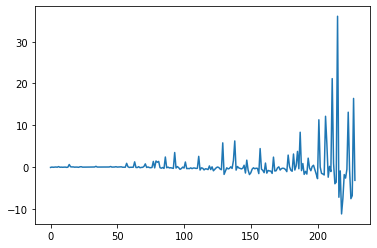

In [27]:
max(z)
plt.plot(z)
plt.show()

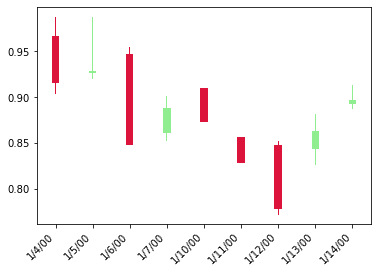

"\nplt.plot([1,2,3,4,5],aaplHigh[0:5])\nplt.legend(['first line'])\nplt.ylabel('High Price')\nplt.plot([1,2,3,4,5],aaplLow[0:5])\nplt.legend(['first line'])\n\nplt.ylabel('Low Price')\nplt.plot([1,2,3,4,5],aaplOpen[0:5],1)\nplt.legend(['first line'])\n\nplt.ylabel('Open Price')\nplt.plot([1,2,3,4,5],aaplClose[0:5],'o')\nplt.legend(['hffh'])\n\nplt.ylabel('Close Price')\n\nplt.show()\n"

In [73]:
#size = len(aaplData)
'''
plt.plot([1,2,3,4,5],aaplData[0:5],'o' )
plt.legend(['Open','High','Low','Close'])
plt.ylabel('some numbers')
plt.show()
'''
plt.figure()

width = .2
width2 = .02
smallaapl = aapl[1:10]
#define up and down prices
up = smallaapl[smallaapl['Close']>=smallaapl['Open']]
down = smallaapl[smallaapl['Close']<smallaapl['Open']]

#define colors to use
col1 = 'lightgreen'
col2 = 'crimson'
#plot up prices
plt.bar(up.index,up.Close-up.Open,width,bottom=up.Open,color=col1)
plt.bar(up.index,up.High-up.Close,width2,bottom=up.Close,color=col1)
plt.bar(up.index,up.Low-up.Open,width2,bottom=up.Open,color=col1)

#plot down prices
plt.bar(down.index,down.Close-down.Open,width,bottom=down.Open,color=col2)
plt.bar(down.index,down.High-down.Open,width2,bottom=down.Open,color=col2)
plt.bar(down.index,down.Low-down.Close,width2,bottom=down.Close,color=col2)
x = [1,2,3,4,5,6,7,8,9]
#rotate x-axis tick labels
plt.xticks(x,smallaapl['Date'])

plt.xticks(rotation=45, ha='right')
#display candlestick chart
plt.show()

'''
plt.plot([1,2,3,4,5],aaplHigh[0:5])
plt.legend(['first line'])
plt.ylabel('High Price')
plt.plot([1,2,3,4,5],aaplLow[0:5])
plt.legend(['first line'])

plt.ylabel('Low Price')
plt.plot([1,2,3,4,5],aaplOpen[0:5],1)
plt.legend(['first line'])

plt.ylabel('Open Price')
plt.plot([1,2,3,4,5],aaplClose[0:5],'o')
plt.legend(['hffh'])

plt.ylabel('Close Price')

plt.show()
'''


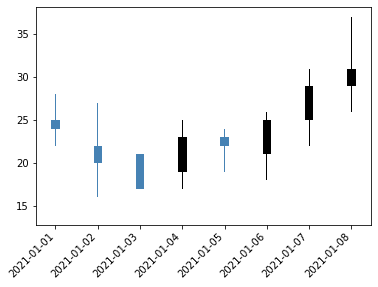

In [66]:
#create figure
plt.figure()
#create DataFrame
prices2 = pd.DataFrame({'open': [25, 22, 21, 19, 23, 21, 25, 29],
                       'close': [24, 20, 17, 23, 22, 25, 29, 31],
                       'high': [28, 27, 29, 25, 24, 26, 31, 37],
                       'low': [22, 16, 14, 17, 19, 18, 22, 26]},
                       index=pd.date_range("2021-01-01", periods=8, freq="d"))
#define width of candlestick elements
width = .2
width2 = .02

#define up and down prices
up = prices2[prices2['close']>=prices2['open']]
down = prices2[prices2['close']<prices2['open']]

#define colors to use
col1 = 'black'
col2 = 'steelblue'

#plot up prices
plt.bar(up.index,up.close-up.open,width,bottom=up.open,color=col1)
plt.bar(up.index,up.high-up.close,width2,bottom=up.close,color=col1)
plt.bar(up.index,up.low-up.open,width2,bottom=up.open,color=col1)

#plot down prices
plt.bar(down.index,down.close-down.open,width,bottom=down.open,color=col2)
plt.bar(down.index,down.high-down.open,width2,bottom=down.open,color=col2)
plt.bar(down.index,down.low-down.close,width2,bottom=down.close,color=col2)

#rotate x-axis tick labels
plt.xticks(rotation=45, ha='right')

#display candlestick chart
plt.show()